### First, let's take a look how our dataset looks like

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MAIN_DIR = os.getcwd()
IMAGES_PATH  = os.path.join(MAIN_DIR, 'images')

dog_counter, cat_counter = 0,0

for image in os.listdir(IMAGES_PATH):
    
    if image.startswith('cat'):
        cat_counter +=1
    
    else:
        dog_counter +=1 
        
    
print(f'Number of dog images: { dog_counter}')
print(f'Number of cat images: {cat_counter}')


Number of dog images: 1500
Number of cat images: 1500


### Okay, so that is not a lot of images, but we'll use data augmentation techniques to generate more data. But first we need to prepare images - which means getting each category a folder, and split all data into train and test set

In [3]:

# create a directory called dataset 
path = f'{MAIN_DIR}/dataset'
os.mkdir(path=path)

In [4]:

# now create there train and test folder 
os.mkdir(path = f'{path}/train')
os.mkdir(path = f'{path}/test')

In [5]:
# and in each folder create cat and dog folder

os.mkdir(path = f'{path}/train/dogs')
os.mkdir(path = f'{path}/train/cats')

os.mkdir(path = f'{path}/test/dogs')
os.mkdir(path = f'{path}/test/cats')

### Now we are ready to split all our images and  move them


In [6]:
num_of_train_images = int(np.round(3000 * 0.8))
num_of_test_images = int(np.round(3000 * 0.2))

print(f'Number of train samples: {num_of_train_images}')
print(f'Number of test samples: {num_of_test_images}')

Number of train samples: 2400
Number of test samples: 600


In [7]:
cat_files, dog_files= [], []

for image in os.listdir(IMAGES_PATH):
    
    if image.startswith('cat'):
        cat_files.append(os.path.join(IMAGES_PATH,image))
    else:
        dog_files.append(os.path.join(IMAGES_PATH,image))

print(len(cat_files))
print(len(dog_files))

1500
1500


In [8]:
import shutil 

iterator = 0

for cat_file in cat_files:
    
    if iterator < 1200:
        shutil.move(src = cat_file, dst = f'{path}/train/cats')
    else:
        shutil.move(src = cat_file, dst = f'{path}/test/cats')
    
    iterator +=1
    

In [9]:
iterator = 0

for dog_file in dog_files:
    
    if iterator <= 1200:
        shutil.move(src = dog_file, dst = f'{path}/train/dogs')
    else:
        shutil.move(src = dog_file, dst = f'{path}/test/dogs')
    
    iterator +=1
    

### Okay, we have sucessfully set up our dataset and now we can build a model use data augmentation to boost accuracy 

In [10]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
TRAIN_PATH  = f'{path}/train'
TEST_PATH  = f'{path}/test'

In [12]:
input_shape = (256,256, 3)
nb_epochs = 50
batch_size = 32

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size =(3,3), activation ='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size =(3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size =(3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
  
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2400   // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=600   // batch_size,
        verbose=1)

Epoch 1/50
75/75 [==============================] - 56s 750ms/step - loss: 0.7000 - acc: 0.5200 - val_loss: 0.6770 - val_acc: 0.5868
Epoch 2/50
75/75 [==============================] - 50s 667ms/step - loss: 0.6931 - acc: 0.5387 - val_loss: 0.6883 - val_acc: 0.5757
Epoch 3/50
75/75 [==============================] - 49s 654ms/step - loss: 0.6703 - acc: 0.5817 - val_loss: 0.6427 - val_acc: 0.6303
Epoch 4/50
75/75 [==============================] - 48s 644ms/step - loss: 0.6495 - acc: 0.6229 - val_loss: 0.6661 - val_acc: 0.6162
Epoch 5/50
75/75 [==============================] - 49s 656ms/step - loss: 0.6461 - acc: 0.6267 - val_loss: 0.6672 - val_acc: 0.5704
Epoch 6/50
75/75 [==============================] - 46s 619ms/step - loss: 0.6112 - acc: 0.6721 - val_loss: 0.5698 - val_acc: 0.7148
Epoch 7/50
75/75 [==============================] - 51s 686ms/step - loss: 0.5736 - acc: 0.7050 - val_loss: 0.6531 - val_acc: 0.6373
Epoch 8/50
75/75 [==============================] - 52s 691ms/step - 

### Let's show some statistics of how our model did

In [16]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<class 'range'>


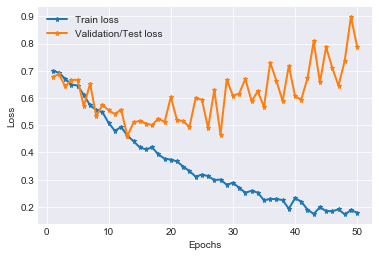

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_as_list = range(1, len(loss_values) +1)

print(type(epochs_as_list))

plt.style.use('seaborn-darkgrid')

train_loss_line = plt.plot(epochs_as_list, loss_values, label = 'Train loss' )
test_loss_line = plt.plot(epochs_as_list, val_loss_values, label = 'Validation/Test loss' )

plt.setp(train_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)
plt.setp(test_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

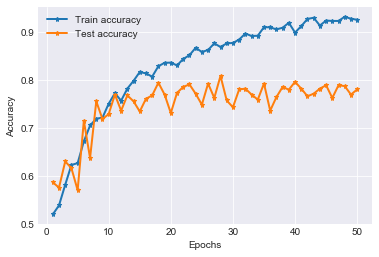

In [18]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_acc_line = plt.plot(epochs_as_list, acc_values, label='Train accuracy')
test_acc_line = plt.plot(epochs_as_list, val_acc_values, label='Test accuracy')

plt.setp(train_acc_line, linewidth = 2.0, marker = '*', markersize =5.0)
plt.setp(test_acc_line, linewidth=2.0, marker= '*', markersize = 5.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
import math

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'dataset/test', 
    target_size=(256, 256),
    batch_size=batch_size)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 600 images belonging to 2 classes.


In [20]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

print(f'Class labels: {class_labels}')

Class labels: ['cats', 'dogs']


In [21]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns

# Warning:
# https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

        cats       0.50      1.00      0.67       300
        dogs       0.00      0.00      0.00       300

   micro avg       0.50      0.50      0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



D:\Anaconda\envs\deep_tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\deep_tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\deep_tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


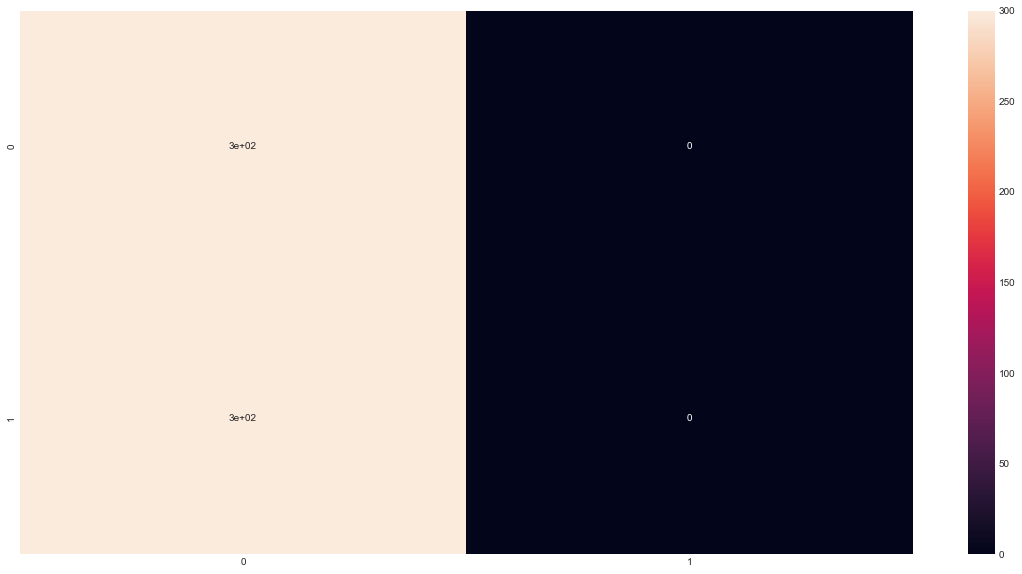

In [22]:
cm = confusion_matrix(y_true = true_classes, y_pred=predicted_classes)
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)

(1, 256, 256, 3)
[[0.9832449]]
DOG


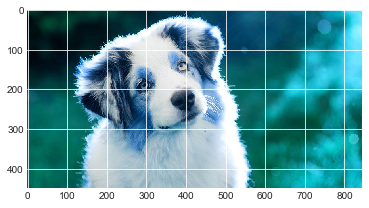

In [25]:
import cv2

img = cv2.imread('test.jpg', 1)
plt.imshow(img)

resized = cv2.resize(img, (256,256), cv2.INTER_AREA).astype('float32')
resized /= 255



img_4d = np.expand_dims(resized, 0)
print(img_4d.shape)

category = model.predict(img_4d)
print(category)
if category[0] >= 0.5:
    print('DOG')
else:
    print('CAT')